# DATA EPLORATION AND ENGINEERING

## 1) Loading the wine data

In [3]:
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler


### 1.1) Loading Red Wine

In [5]:
url = "https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/UCL-Wine/winequality-red.csv"

red_wine_df = pd.read_csv(url, delimiter=";", header=0)

In [6]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.2) Loading White Wine

In [8]:
url_white = "https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/UCL-Wine/winequality-white.csv"

white_wine_df = pd.read_csv(url_white, delimiter=";", header=0)

In [9]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
white_wine_df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 2) Cleaning the data

### 2.0) General exploration

#### 2.0.1) Red Wine

In [14]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 2.0.2) White wine 

In [17]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 2.1) Exploring the missing values

#### 2.1.1) Red Wine

In [21]:
red_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 2.1.2) White Wine

In [23]:
white_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2.2) Removing duplicates

#### 2.2.1) Red Wine

In [26]:
duplicates_rw = red_wine_df.duplicated(keep='first').sum()
duplicates_rw

240

In [27]:
red_wine_df_f2 = red_wine_df.drop_duplicates()
red_wine_df_f2.shape[0]

1359

#### 2.2.2) White wine

In [29]:
duplicates_ww = white_wine_df.duplicated(keep='first').sum()
duplicates_ww

937

In [30]:
white_wine_df_f2 = white_wine_df.drop_duplicates()
white_wine_df_f2.shape[0]

3961

## 3) Aggregating the two files

### 3.1) Adding columns to the two data frames

In [33]:
red_wine_df_f2["wine type"] = "red"
white_wine_df_f2["wine type"] = "white"


C:\Users\acm11\AppData\Local\Temp\ipykernel_11152\3092713722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_wine_df_f2["wine type"] = "red"
C:\Users\acm11\AppData\Local\Temp\ipykernel_11152\3092713722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wine_df_f2["wine type"] = "white"


### 3.2) Concatenating red_wine_df_f2 and white_wine_df_f2

In [35]:
combined_wine_df = pd.concat([red_wine_df_f2, white_wine_df_f2], ignore_index=True)

## 4) General exploration of combined_wine_df

In [37]:
combined_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [38]:
combined_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine type             5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


## 5) Calculating the descriptive statistics of the numeric data

### 5.1) Statistical descriptions of the values

In [41]:
combined_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 5.2) Calculating the skewness of all the columns with numeric values

#### 5.2.1) Removing wine type (because it isn't numerical)

In [44]:
columns_to_exclude = ["wine type"]

combined_wine_df_numerical = combined_wine_df.drop(columns = columns_to_exclude)

#### 5.2.2) Calculating the skewness of each column

In [46]:
skewness = combined_wine_df_numerical.skew()

print(skewness)

fixed acidity           1.650417
volatile acidity        1.504557
citric acid             0.484309
residual sugar          1.706550
chlorides               5.338237
free sulfur dioxide     1.362719
total sulfur dioxide    0.063614
density                 0.666326
pH                      0.389969
sulphates               1.809454
alcohol                 0.545696
quality                 0.147467
dtype: float64


It seems like the following aren't normally distributed:  
- fixed acidity
- volatile acidity
- residual sugar
- chlorides
- free sulfur dioxide
- sulphates


### 5.3) Visualizing the columns with histograms

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

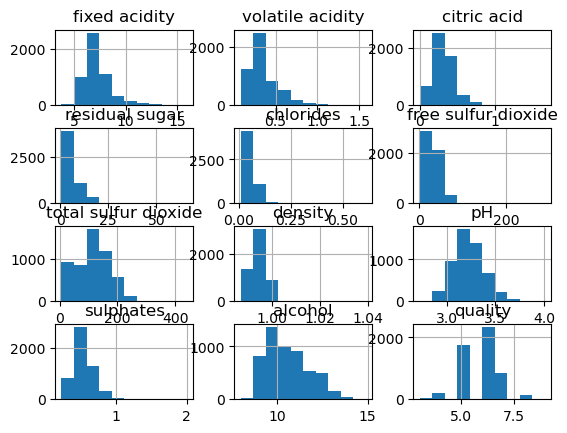

In [49]:
combined_wine_df_numerical.hist()

#### 5.3.2) Histogram of quality  

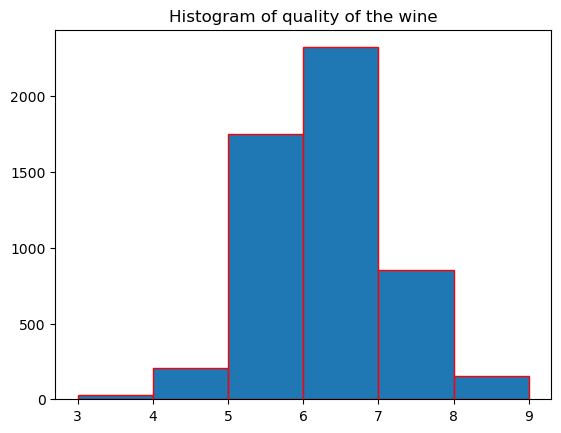

In [51]:
plt.hist(combined_wine_df_numerical['quality'], bins=6, edgecolor = 'red')
plt.title("Histogram of quality of the wine")

plt.show()

#### 5.3.2) Histogram of the chlorides

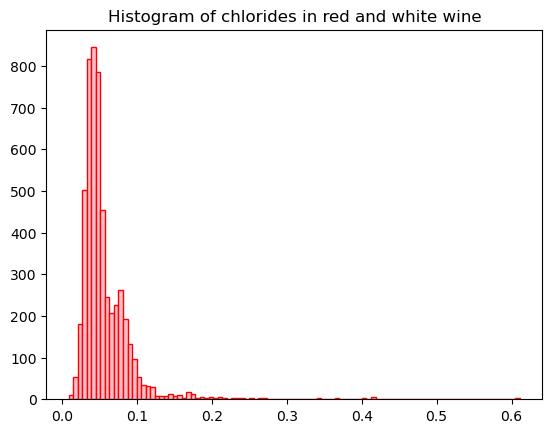

In [53]:
plt.hist(combined_wine_df_numerical['chlorides'], bins=100, edgecolor = 'red', color="pink")
plt.title("Histogram of chlorides in red and white wine")

plt.show()

##### 5.3.2.1) For fun: Using my own function to get the outliers of the data

In [55]:
from bi_functions_tobias import calculate_outliers


In [56]:
df_no_outliers_of_all_numcol_except_quality = calculate_outliers(combined_wine_df_numerical, True, True, "quality")
df_no_outliers_of_all_numcol_except_quality.describe()

No outliers calculated for the column arguments
Number of outliers in fixed acidity: 304
Number of outliers in volatile acidity: 310
Number of outliers in citric acid: 322
Number of outliers in residual sugar: 85
Number of outliers in chlorides: 325
Number of outliers in free sulfur dioxide: 43
Number of outliers in total sulfur dioxide: 8
Number of outliers in density: 0
Number of outliers in pH: 31
Number of outliers in sulphates: 80
Number of outliers in alcohol: 0
Total number of outliers: 1508


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000
mean,6.907686,0.291026,0.318124,5.209378,0.045052,32.096668,125.859523,0.993757,3.213974,0.499147,10.670911,5.894544
std,0.863230,0.107464,0.094824,4.214555,0.013587,15.546357,48.092274,0.002650,0.146414,0.112489,1.185007,0.867139
min,4.700000,0.080000,0.060000,0.600000,0.009000,2.000000,6.000000,0.987110,2.800000,0.220000,8.400000,3.000000
25%,6.300000,0.220000,0.260000,1.700000,0.036000,20.000000,97.000000,0.991650,3.110000,0.420000,9.700000,5.000000
50%,6.800000,0.270000,0.310000,3.500000,0.043000,31.000000,125.000000,0.993660,3.210000,0.490000,10.500000,6.000000
75%,7.400000,0.340000,0.370000,7.900000,0.052000,43.000000,158.000000,0.995762,3.310000,0.570000,11.500000,6.000000
max,9.600000,0.655000,0.570000,17.200000,0.083000,77.500000,251.000000,1.001700,3.630000,0.820000,14.200000,9.000000


In [57]:
df_no_outliers_of_chosen_columns= calculate_outliers(combined_wine_df_numerical, True, False, "chlorides", "density", "fixed acidity")

df_no_outliers_of_chosen_columns.describe()

Outliers only calculated for the column arguments
Number of outliers in chlorides: 237
Number of outliers in density: 2
Number of outliers in fixed acidity: 265
Total number of outliers: 504


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4816.000000,4816.000000,4816.000000,4816.00000,4816.000000,4816.000000,4816.000000,4816.000000,4816.000000,4816.000000,4816.000000,4816.000000
mean,6.982309,0.333281,0.305681,5.21847,0.049715,31.118044,119.091466,0.994247,3.231017,0.518870,10.582108,5.812085
std,0.921707,0.162197,0.137053,4.51409,0.018098,17.551489,54.621683,0.002792,0.161054,0.129991,1.194486,0.878134
min,4.500000,0.080000,0.000000,0.60000,0.009000,1.000000,6.000000,0.987110,2.790000,0.220000,8.000000,3.000000
25%,6.400000,0.220000,0.240000,1.70000,0.037000,18.000000,85.000000,0.992000,3.120000,0.430000,9.500000,5.000000
50%,6.900000,0.290000,0.300000,2.90000,0.046000,29.000000,120.000000,0.994300,3.220000,0.500000,10.400000,6.000000
75%,7.500000,0.390000,0.370000,7.80000,0.057000,42.000000,156.000000,0.996400,3.340000,0.590000,11.400000,6.000000
max,9.600000,1.330000,1.660000,26.05000,0.108000,289.000000,440.000000,1.002950,4.010000,1.620000,14.200000,9.000000


In [58]:
df_no_outliers_of_chosen_columns.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


(array([  1.,   2.,   5.,   8.,  13.,  20.,  34.,  43.,  69., 117., 156.,
        181., 228., 270., 274., 281., 283., 274., 285., 290., 245., 178.,
        182., 119., 108.,  87.,  58.,  59.,  60.,  63.,  65.,  49.,  68.,
         72.,  72.,  83.,  62.,  64.,  43.,  41.,  35.,  31.,  32.,  30.,
         23.,  15.,  12.,  12.,   7.,   7.]),
 array([0.009  , 0.01098, 0.01296, 0.01494, 0.01692, 0.0189 , 0.02088,
        0.02286, 0.02484, 0.02682, 0.0288 , 0.03078, 0.03276, 0.03474,
        0.03672, 0.0387 , 0.04068, 0.04266, 0.04464, 0.04662, 0.0486 ,
        0.05058, 0.05256, 0.05454, 0.05652, 0.0585 , 0.06048, 0.06246,
        0.06444, 0.06642, 0.0684 , 0.07038, 0.07236, 0.07434, 0.07632,
        0.0783 , 0.08028, 0.08226, 0.08424, 0.08622, 0.0882 , 0.09018,
        0.09216, 0.09414, 0.09612, 0.0981 , 0.10008, 0.10206, 0.10404,
        0.10602, 0.108  ]),
 <BarContainer object of 50 artists>)

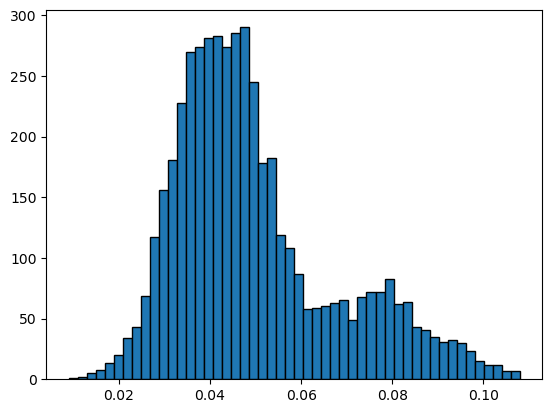

In [59]:
plt.hist(df_no_outliers_of_chosen_columns["chlorides"], bins=50, edgecolor="black")

In [60]:
skewness_of_chlorides_no_outliers = df_no_outliers_of_chosen_columns["chlorides"].skew()

print(skewness_of_chlorides_no_outliers)

0.9344217607149731


In [61]:
dict_with_outlier_data = calculate_outliers(combined_wine_df_numerical, False, False)

No column arguments chosen. Outliers for all columns with numerical values are calculated
Number of outliers in fixed acidity: 304
Number of outliers in volatile acidity: 310
Number of outliers in citric acid: 322
Number of outliers in residual sugar: 85
Number of outliers in chlorides: 325
Number of outliers in free sulfur dioxide: 43
Number of outliers in total sulfur dioxide: 8
Number of outliers in density: 0
Number of outliers in pH: 31
Number of outliers in sulphates: 80
Number of outliers in alcohol: 0
Number of outliers in quality: 141
Total number of outliers: 1649


In [62]:
df_no_outliers_2 = dict_with_outlier_data["df_without_outliers"]

outliers_of_residual_sugar = dict_with_outlier_data["residual sugar"]["outliers"]

combined_wine_df_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [63]:
df_no_outliers_2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000
mean,6.911032,0.290744,0.317540,5.214097,0.045330,32.076682,126.184691,0.993821,3.213236,0.499771,10.627734,5.827295
std,0.863960,0.107611,0.095421,4.226812,0.013571,15.608918,48.447306,0.002641,0.146362,0.111636,1.165764,0.766197
min,4.700000,0.080000,0.060000,0.600000,0.009000,2.000000,6.000000,0.987110,2.800000,0.220000,8.400000,4.000000
25%,6.300000,0.220000,0.260000,1.700000,0.036000,20.000000,97.000000,0.991720,3.110000,0.420000,9.600000,5.000000
50%,6.800000,0.270000,0.310000,3.500000,0.044000,31.000000,125.000000,0.993780,3.200000,0.490000,10.500000,6.000000
75%,7.400000,0.340000,0.370000,7.900000,0.052000,43.000000,159.000000,0.995800,3.310000,0.570000,11.400000,6.000000
max,9.600000,0.655000,0.570000,17.200000,0.083000,77.500000,251.000000,1.001700,3.630000,0.820000,14.200000,7.000000


## 6) Visualization with diagrams

### 6.1) What does diagrams show exactly?

### 6.2) Which wine type has higher average quality?

Text(0.5, 5.73904351459103, 'Difference: 0.23')

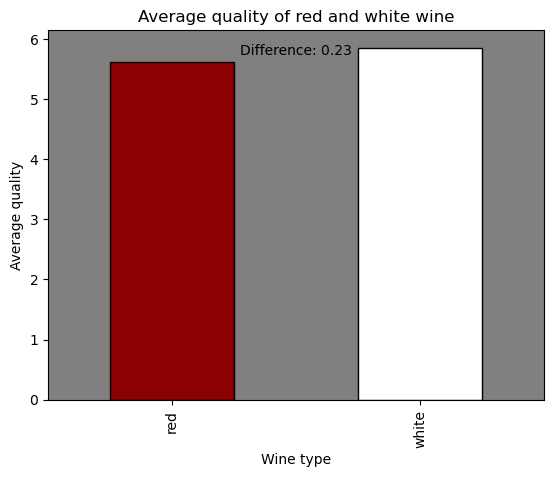

In [116]:
avg_quality = combined_wine_df.groupby("wine type")["quality"].mean()


fig, ax = plt.subplots()

avg_quality.plot(kind='bar', color=['darkred', 'white'], edgecolor='black', ax=ax)

plt.title("Average quality of red and white wine")
plt.xlabel("Wine type")
plt.ylabel("Average quality")
ax.set_facecolor("gray")

diff = avg_quality['white'] - avg_quality['red']

# A text (label) is added to the plot. 
# First argument is the placement of the text box on the x-axis = 0.5
# Second argument is text box on the y-axis = (...)/2
# Third is the text to be shown. Here it is a formatted string where the diff variables is shown with 2 decimals (:.2f)
# Fourth (ha="") is the placement of the text inside the text box on the  axis ha = horizontal alignment
plt.text(0.5, (avg_quality['white'] + avg_quality['red']) / 2, f'Difference: {diff:.5f}', ha='center')


### 6.3) Which type of wine has higher level of alcohol

Text(1, 9.999357906252628, '10.59')

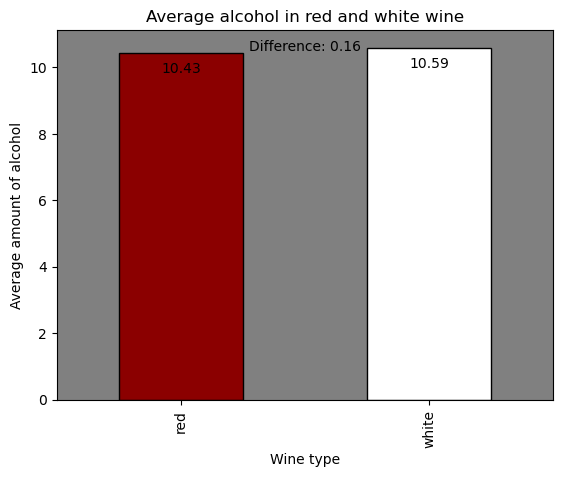

In [141]:
avg_quality = combined_wine_df.groupby("wine type")["alcohol"].mean()


fig, ax = plt.subplots()

avg_quality.plot(kind='bar', color=['darkred', 'white'], edgecolor='black', ax=ax)

plt.title("Average alcohol in red and white wine")
plt.xlabel("Wine type")
plt.ylabel("Average amount of alcohol")
ax.set_facecolor("gray")

diff = avg_quality['white'] - avg_quality['red']

# A text (label) is added to the plot. 
# First argument is the placement of the text box on the x-axis = 0.5
# Second argument is text box on the y-axis = (...)/2
# Third is the text to be shown. Here it is a formatted string where the diff variables is shown with 2 decimals (:.2f)
# Fourth (ha="") is the placement of the text inside the text box on the  axis ha = horizontal alignment
plt.text(0.5, (avg_quality['white'] + avg_quality['red']) / 2, f'Difference: {diff:.2f}', ha='center')

plt.text(0, avg_quality['red']-.59, f"{avg_quality['red']:.2f}", ha="center")
plt.text(1, avg_quality['white']-.59, f"{avg_quality['white']:.2f}", ha="center")


## 11) Checking for outliers in 'residual sugar' ######### CHANGE FROM FIXED ACIDITY #########

#### 11.1) combined_wine_df

##### 11.1.1) Finding the outliers through quantiles

In [116]:
df_rw_without_outliers = calculate_outliers(red_wine_df_f2, False)

df_rw_without_outliers["fixed acidity"]["outliers"]
mean_acidity = df_rw_without_outliers["df_without_outliers"]["fixed acidity"].mean()
print("Mean of fixed acidity: " + str(mean_acidity))
print(df_rw_without_outliers["df_without_outliers"]["fixed acidity"].min())
print(df_rw_without_outliers["df_without_outliers"]["fixed acidity"].median())
print(red_wine_df_f2["fixed acidity"].mean())


no args
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Number of outliers in fixed acidity: 41
Number of outliers in volatile acidity: 19
Number of outliers in citric acid: 1
Number of outliers in residual sugar: 112
Number of outliers in chlorides: 73
Number of outliers in free sulfur dioxide: 23
Number of outliers in total sulfur dioxide: 44
Number of outliers in density: 20
Number of outliers in pH: 16
Number of outliers in sulphates: 23
Number of outliers in alcohol: 2
Number of outliers in quality: 11
Total number of outliers: 385
Mean of fixed acidity: 8.140451745379876
5.1
7.8
8.310596026490067


###### (Standard deviation - just my own exploration)

In [ ]:
std_fix_aci = red_wine_df["fixed acidity"].std()
print(std_fix_aci)

In [ ]:
mean_fix_aci = red_wine_df["fixed acidity"].mean()
print(mean_fix_aci)

In [ ]:
Lower_Fence_from_std = mean_fix_aci - (3*std_fix_aci)
print("Lower Fence from std: " + str(Lower_Fence_from_std))
print("Lower Fence from quantiles: " + str(Lower_Fence))



###### Removing outliers 

In [ ]:
#red_wine_df_f1 = red_wine_df[~outliers_condition] 

In [ ]:
#red_wine_df_f1.iloc[240:250]

In [ ]:
#columns = red_wine_df_f1.shape[1]
#rows = red_wine_df_f1.shape[0]

#print("Number of columns: " + str(columns))
#print("Number of rows: " + str(rows))


In [ ]:
#row_2 = red_wine_df_f1.iloc[2]
"print(row_2)